In [6]:
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingCVClassifier
import numpy as np
import warnings

warnings.simplefilter('ignore')

RANDOM_SEED = 42

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=RANDOM_SEED)
clf3 = GaussianNB()
lr = LogisticRegression()

# Starting from v0.16.0, StackingCVRegressor supports
# 'random_state' to get deterministic result.
sclf = StackingCVClassifier(classifiers=[clf1, clf2, clf3],
                            meta_classifier=lr,
                            random_state=RANDOM_SEED)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf],
                      ['KNN',
                       'Random Forest',
                       'Naive Bayes',
                       'StackingClassifier']):
    scores = model_selection.cross_val_score(clf, X, y,
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))


3-fold cross validation:

Accuracy: 0.91 (+/- 0.01) [KNN]
Accuracy: 0.95 (+/- 0.01) [Random Forest]
Accuracy: 0.91 (+/- 0.02) [Naive Bayes]
Accuracy: 0.93 (+/- 0.02) [StackingClassifier]


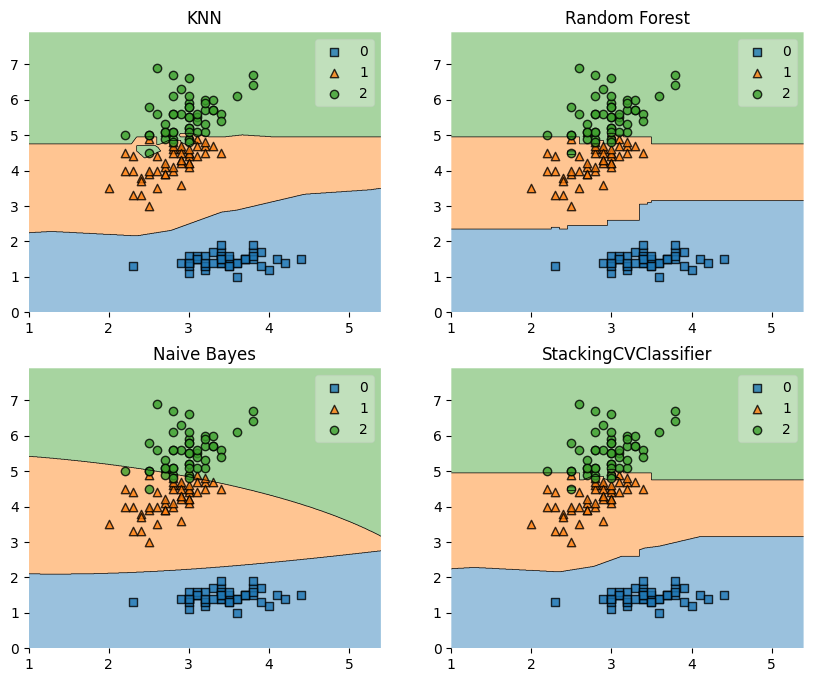

In [7]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools


gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

for clf, lab, grd in zip([clf1, clf2, clf3, sclf],
                         ['KNN',
                          'Random Forest',
                          'Naive Bayes',
                          'StackingCVClassifier'],
                         itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(lab)

plt.show()


In [ ]:
# Defining the classifiers
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()

sclf = StackingCVClassifier(classifiers=[clf1, clf2, clf3],
                            use_probas=True,
                            meta_classifier=lr,
                            random_state=42)

# Cross-validation and printing results
print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf],
                      ['KNN', 'Random Forest', 'Naive Bayes', 'StackingClassifier']):
    scores = model_selection.cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f}) [{label}]")


3-fold cross validation:

Accuracy: 0.91 (+/- 0.01) [KNN]
Accuracy: 0.95 (+/- 0.01) [Random Forest]
Accuracy: 0.91 (+/- 0.02) [Naive Bayes]
Accuracy: 0.95 (+/- 0.02) [StackingClassifier]


In [9]:
# Importing the necessary libraries and modules
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from mlxtend.classifier import StackingCVClassifier

# Setting a seed for reproducibility (assuming you want this)
RANDOM_SEED = 42

# Initializing individual models
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=RANDOM_SEED)
clf3 = GaussianNB()
lr = LogisticRegression()

# Initializing the StackingCVClassifier
sclf = StackingCVClassifier(classifiers=[clf1, clf2, clf3],
                            meta_classifier=lr,
                            use_probas=True,
                            random_state=42)

# Defining the parameter grid for hyperparameter tuning
params = {
    'kneighborsclassifier__n_neighbors': [1, 5],
    'randomforestclassifier__n_estimators': [10, 50],
    'meta_classifier__C': [0.1, 10.0]
}

# Initializing GridSearch for hyperparameter tuning
grid = GridSearchCV(estimator=sclf,
                    param_grid=params,
                    cv=5,
                    refit=True)

# Fitting the grid search to the data
grid.fit(X, y)

# Displaying the results of the grid search
cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print(f"{grid.cv_results_[cv_keys[0]][r]:.3f} +/- {grid.cv_results_[cv_keys[1]][r] / 2.0:.2f} for {grid.cv_results_[cv_keys[2]][r]}")


0.927 +/- 0.03 for {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 10}
0.933 +/- 0.03 for {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 50}
0.940 +/- 0.02 for {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 10}
0.933 +/- 0.02 for {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 50}
0.947 +/- 0.02 for {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 10}
0.947 +/- 0.02 for {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 50}
0.947 +/- 0.02 for {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 10}
0.947 +/- 0.02 for {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C'

In [10]:
# Importing necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingCVClassifier

# Define a random seed for reproducibility
RANDOM_SEED = 42

# Initializing individual classifiers
knn1 = KNeighborsClassifier(n_neighbors=1)
knn2 = KNeighborsClassifier(n_neighbors=1)  # This seems to be repeated, you might want to change the parameters
rf = RandomForestClassifier(random_state=RANDOM_SEED)
gnb = GaussianNB()
lr = LogisticRegression()

# Initializing the StackingCVClassifier with the individual classifiers
stacked_clf = StackingCVClassifier(classifiers=[knn1, knn2, rf, gnb],
                                   meta_classifier=lr,
                                   random_state=RANDOM_SEED)

# Define hyperparameters for grid search
param_grid = {
    'kneighborsclassifier-1__n_neighbors': [1, 5],
    'kneighborsclassifier-2__n_neighbors': [1, 5],
    'randomforestclassifier__n_estimators': [10, 50],
    'meta_classifier__C': [0.1, 10.0]
}

# Performing grid search
grid_search = GridSearchCV(estimator=stacked_clf,
                           param_grid=param_grid,
                           cv=5,
                           refit=True)

# Fit the grid search on data
grid_search.fit(X, y)

# Extract and print results
cv_keys = ('mean_test_score', 'std_test_score', 'params')
for index, mean in enumerate(grid_search.cv_results_['mean_test_score']):
    print(f"{mean:.3f} +/- {grid_search.cv_results_['std_test_score'][index] / 2.0:.2f} for {grid_search.cv_results_['params'][index]}")


0.940 +/- 0.02 for {'kneighborsclassifier-1__n_neighbors': 1, 'kneighborsclassifier-2__n_neighbors': 1, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 10}
0.940 +/- 0.02 for {'kneighborsclassifier-1__n_neighbors': 1, 'kneighborsclassifier-2__n_neighbors': 1, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 50}
0.940 +/- 0.02 for {'kneighborsclassifier-1__n_neighbors': 1, 'kneighborsclassifier-2__n_neighbors': 1, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 10}
0.940 +/- 0.02 for {'kneighborsclassifier-1__n_neighbors': 1, 'kneighborsclassifier-2__n_neighbors': 1, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 50}
0.960 +/- 0.02 for {'kneighborsclassifier-1__n_neighbors': 1, 'kneighborsclassifier-2__n_neighbors': 5, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 10}
0.953 +/- 0.02 for {'kneighborsclassifier-1__n_neighbors': 1, 'kneighborsclassifier-2__n_neighbors': 5, 'meta_classifier__C

In [11]:
# Import necessary libraries
from sklearn.datasets import load_iris
from mlxtend.classifier import StackingCVClassifier
from mlxtend.feature_selection import ColumnSelector
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a pipeline for the first classifier
# This selects the first and third features (0 and 2) and then applies logistic regression.
pipe1 = make_pipeline(
    ColumnSelector(cols=(0, 2)),
    LogisticRegression()
)

# Create a pipeline for the second classifier
# This selects the second and fourth features (1 and 3) and then applies logistic regression.
pipe2 = make_pipeline(
    ColumnSelector(cols=(1, 3)),
    LogisticRegression()
)

# Combine the two pipelines into a StackingCVClassifier with a logistic regression as the meta classifier.
stacked_classifier = StackingCVClassifier(
    classifiers=[pipe1, pipe2],
    meta_classifier=LogisticRegression(),
    random_state=42
)

# Fit the StackingCVClassifier to the data
stacked_classifier.fit(X, y)


StackingCVClassifier(classifiers=[Pipeline(steps=[('columnselector',
                                                   ColumnSelector(cols=(0, 2))),
                                                  ('logisticregression',
                                                   LogisticRegression())]),
                                  Pipeline(steps=[('columnselector',
                                                   ColumnSelector(cols=(1, 3))),
                                                  ('logisticregression',
                                                   LogisticRegression())])],
                     meta_classifier=LogisticRegression(), random_state=42)